#### From 1D to 2D

A natural `extension` to what we learned so far is 2D classification, for which each data point has `two` features

* Input $x_1$ $x_2$
* Linear regression $y_{\text{pred}}=ax_1+bx_2+c$
* Convert to probability $h(y_{\text{pred}})=\frac{1}{1+e^{-y_{\text{pred}}}}$

Cross-entropy loss for `one sample` remains the same

$$J=-y_{\text{act}}\log(h(y_{\text{pred}}))-(1-y_{\text{act}})\log(1-h(y_{\text{pred}}))$$

where $y_{\text{act}}$ is either 1 or 0

#### Data generation

We first generate some 2D data points for which we want to build a model to do classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

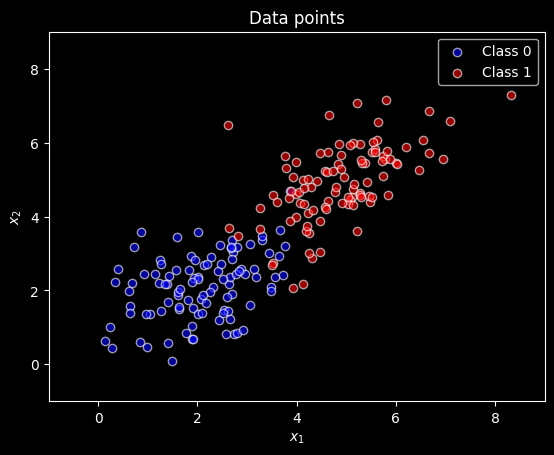

In [ ]:
num_points = 100
np.random.seed(42)

# Class 1
mean1 = [2, 2]
cov1 = [[1, 0.5], [0.5, 1]]
class1 = np.random.multivariate_normal(mean1, cov1, num_points) # (100, 2)

# Class 2
mean2 = [5, 5]
cov2 = [[1, 0.5], [0.5, 1]]
class2 = np.random.multivariate_normal(mean2, cov2, num_points) # (100, 2)

# Labels
labels1 = np.zeros(num_points)
labels2 = np.ones(num_points)

# Combine data
x = np.vstack((class1, class2)) # (200, 2)
y = np.hstack((labels1, labels2))

plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='blue', label='Class 0', alpha=0.6, edgecolors='w')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='red', label='Class 1', alpha=0.6, edgecolors='w')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-1, 9)
plt.ylim(-1, 9)
plt.title('Data points')
plt.legend()
plt.show()

#### Derivation of `gradient` w.r.t. parameters

Derivation of gradient pretty much follows what we have done before

(1) differentiate $J$ w.r.t. $h(y_{\text{pred}})$

$$\frac{dJ}{dh(y_{\text{pred}})}=-\frac{y_\text{act}}{h(y_{\text{pred}})}+\frac{1-y_{\text{act}}}{1-h(y_{\text{pred}})}$$

(2) differentiate $J$ w.r.t. $y_{\text{pred}}$ using chain rule

$$\begin{align*}
\frac{dJ}{dy_{\text{pred}}}&=\frac{dJ}{dh(y_{\text{pred}})}\cdot \frac{dh(y_{\text{pred}})}{dy_{\text{pred}}}\\
&=\left(-\frac{y_\text{act}}{h(y_{\text{pred}})}+\frac{1-y_{\text{act}}}{1-h(y_{\text{pred}})}\right)\cdot -h(y_{\text{pred}})^2\cdot \left(1-\frac{1}{h(y_{\text{pred}})}\right)\\
&=\left(-\frac{y_\text{act}}{h(y_{\text{pred}})}+\frac{1-y_{\text{act}}}{1-h(y_{\text{pred}})}\right)\cdot h(y_{\text{pred}})\cdot \left(1-h(y_{\text{pred}})\right)\\
&=-y_\text{act}\cdot \left(1-h(y_\text{pred})\right)+(1-y_{\text{act}})\cdot h(y_{\text{pred}})\\
&=\boxed{h(y_{\text{pred}})-y_{\text{act}}}
\end{align*}$$

(3) differentiate $J$ w.r.t. $a$ using chain rule

$$\begin{align*}
\frac{dJ}{da}&=\frac{dJ}{dy_{\text{pred}}}\cdot \frac{dy_{\text{pred}}}{da}\\
&=\boxed{\left(h(y_{\text{pred}})-y_{\text{act}}\right)\cdot x_1}
\end{align*}$$

Similarly

$$\begin{align*}
\frac{dJ}{db}&=\frac{dJ}{dy_{\text{pred}}}\cdot \frac{dy_{\text{pred}}}{db}\\
&=\boxed{\left(h(y_{\text{pred}})-y_{\text{act}}\right)\cdot x_2}
\end{align*}$$

and

$$\begin{align*}
\frac{dJ}{dc}&=\frac{dJ}{dy_{\text{pred}}}\cdot \frac{dy_{\text{pred}}}{dc}\\
&=\boxed{\left(h(y_{\text{pred}})-y_{\text{act}}\right)\cdot 1}
\end{align*}$$

#### Putting everything together in Python

In [ ]:
# Initial guess
a = 0
b = 0
c = 0
learning_rate = 0.05
num_iterations = 10000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Store loss values
loss_values = []

# Training loop
for i in range(num_iterations):
    # Forward pass
    y_pred = a * x[:,0] + b * x[:,1] + c # shape (200,)
    h_pred = sigmoid(y_pred)  # shape (200,)

    # Compute loss (cross entropy)
    loss = np.mean(-y*np.log(h_pred) - (1 - y)*np.log(1 - h_pred))

    loss_values.append(loss)

    # Compute gradients
    da = np.mean((h_pred - y) * x[:,0])  # scalar
    db = np.mean((h_pred - y) * x[:,1])
    dc = np.mean((h_pred - y))

    # Update parameters
    a -= learning_rate * da
    b -= learning_rate * db
    c -= learning_rate * dc

    # Print loss every several iterations
    if i % 1000 == 0:
        print(f'Iteration {i}: Loss = {loss}')

Iteration 0: Loss = 0.6931471805599452
Iteration 1000: Loss = 0.2337029525616552
Iteration 2000: Loss = 0.1769341654278621
Iteration 3000: Loss = 0.15418787834124675
Iteration 4000: Loss = 0.14177465595687608
Iteration 5000: Loss = 0.13391399938152296
Iteration 6000: Loss = 0.12847999698342094
Iteration 7000: Loss = 0.12449990532580008
Iteration 8000: Loss = 0.12146280711786962
Iteration 9000: Loss = 0.11907343666531159


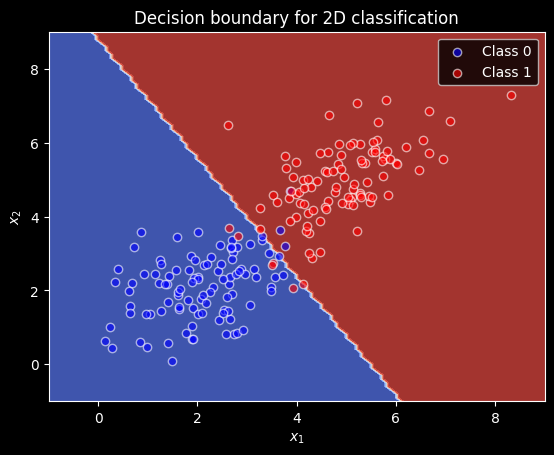

In [ ]:
# Plot decision boundary
xx_1, xx_2 = np.meshgrid(np.linspace(-1, 9, 100), np.linspace(-1, 9, 100))
h_pred = sigmoid(a * xx_1 + b * xx_2 + c)
h_pred_binary = (h_pred > 0.5).astype(int)
plt.contourf(xx_1, xx_2, h_pred_binary, alpha=0.8, cmap=plt.cm.coolwarm, zorder=-1)

plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='blue', label='Class 0', alpha=0.6, edgecolors='w')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='red', label='Class 1', alpha=0.6, edgecolors='w')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Decision boundary for 2D classification')
plt.legend()
plt.show()